In [1]:
# importing libraries and set standards
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import statistics as stat
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

plt.rcParams['figure.figsize'] = 21, 15
plt.rcParams['xtick.labelsize']=65
plt.rcParams['ytick.labelsize']=65
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

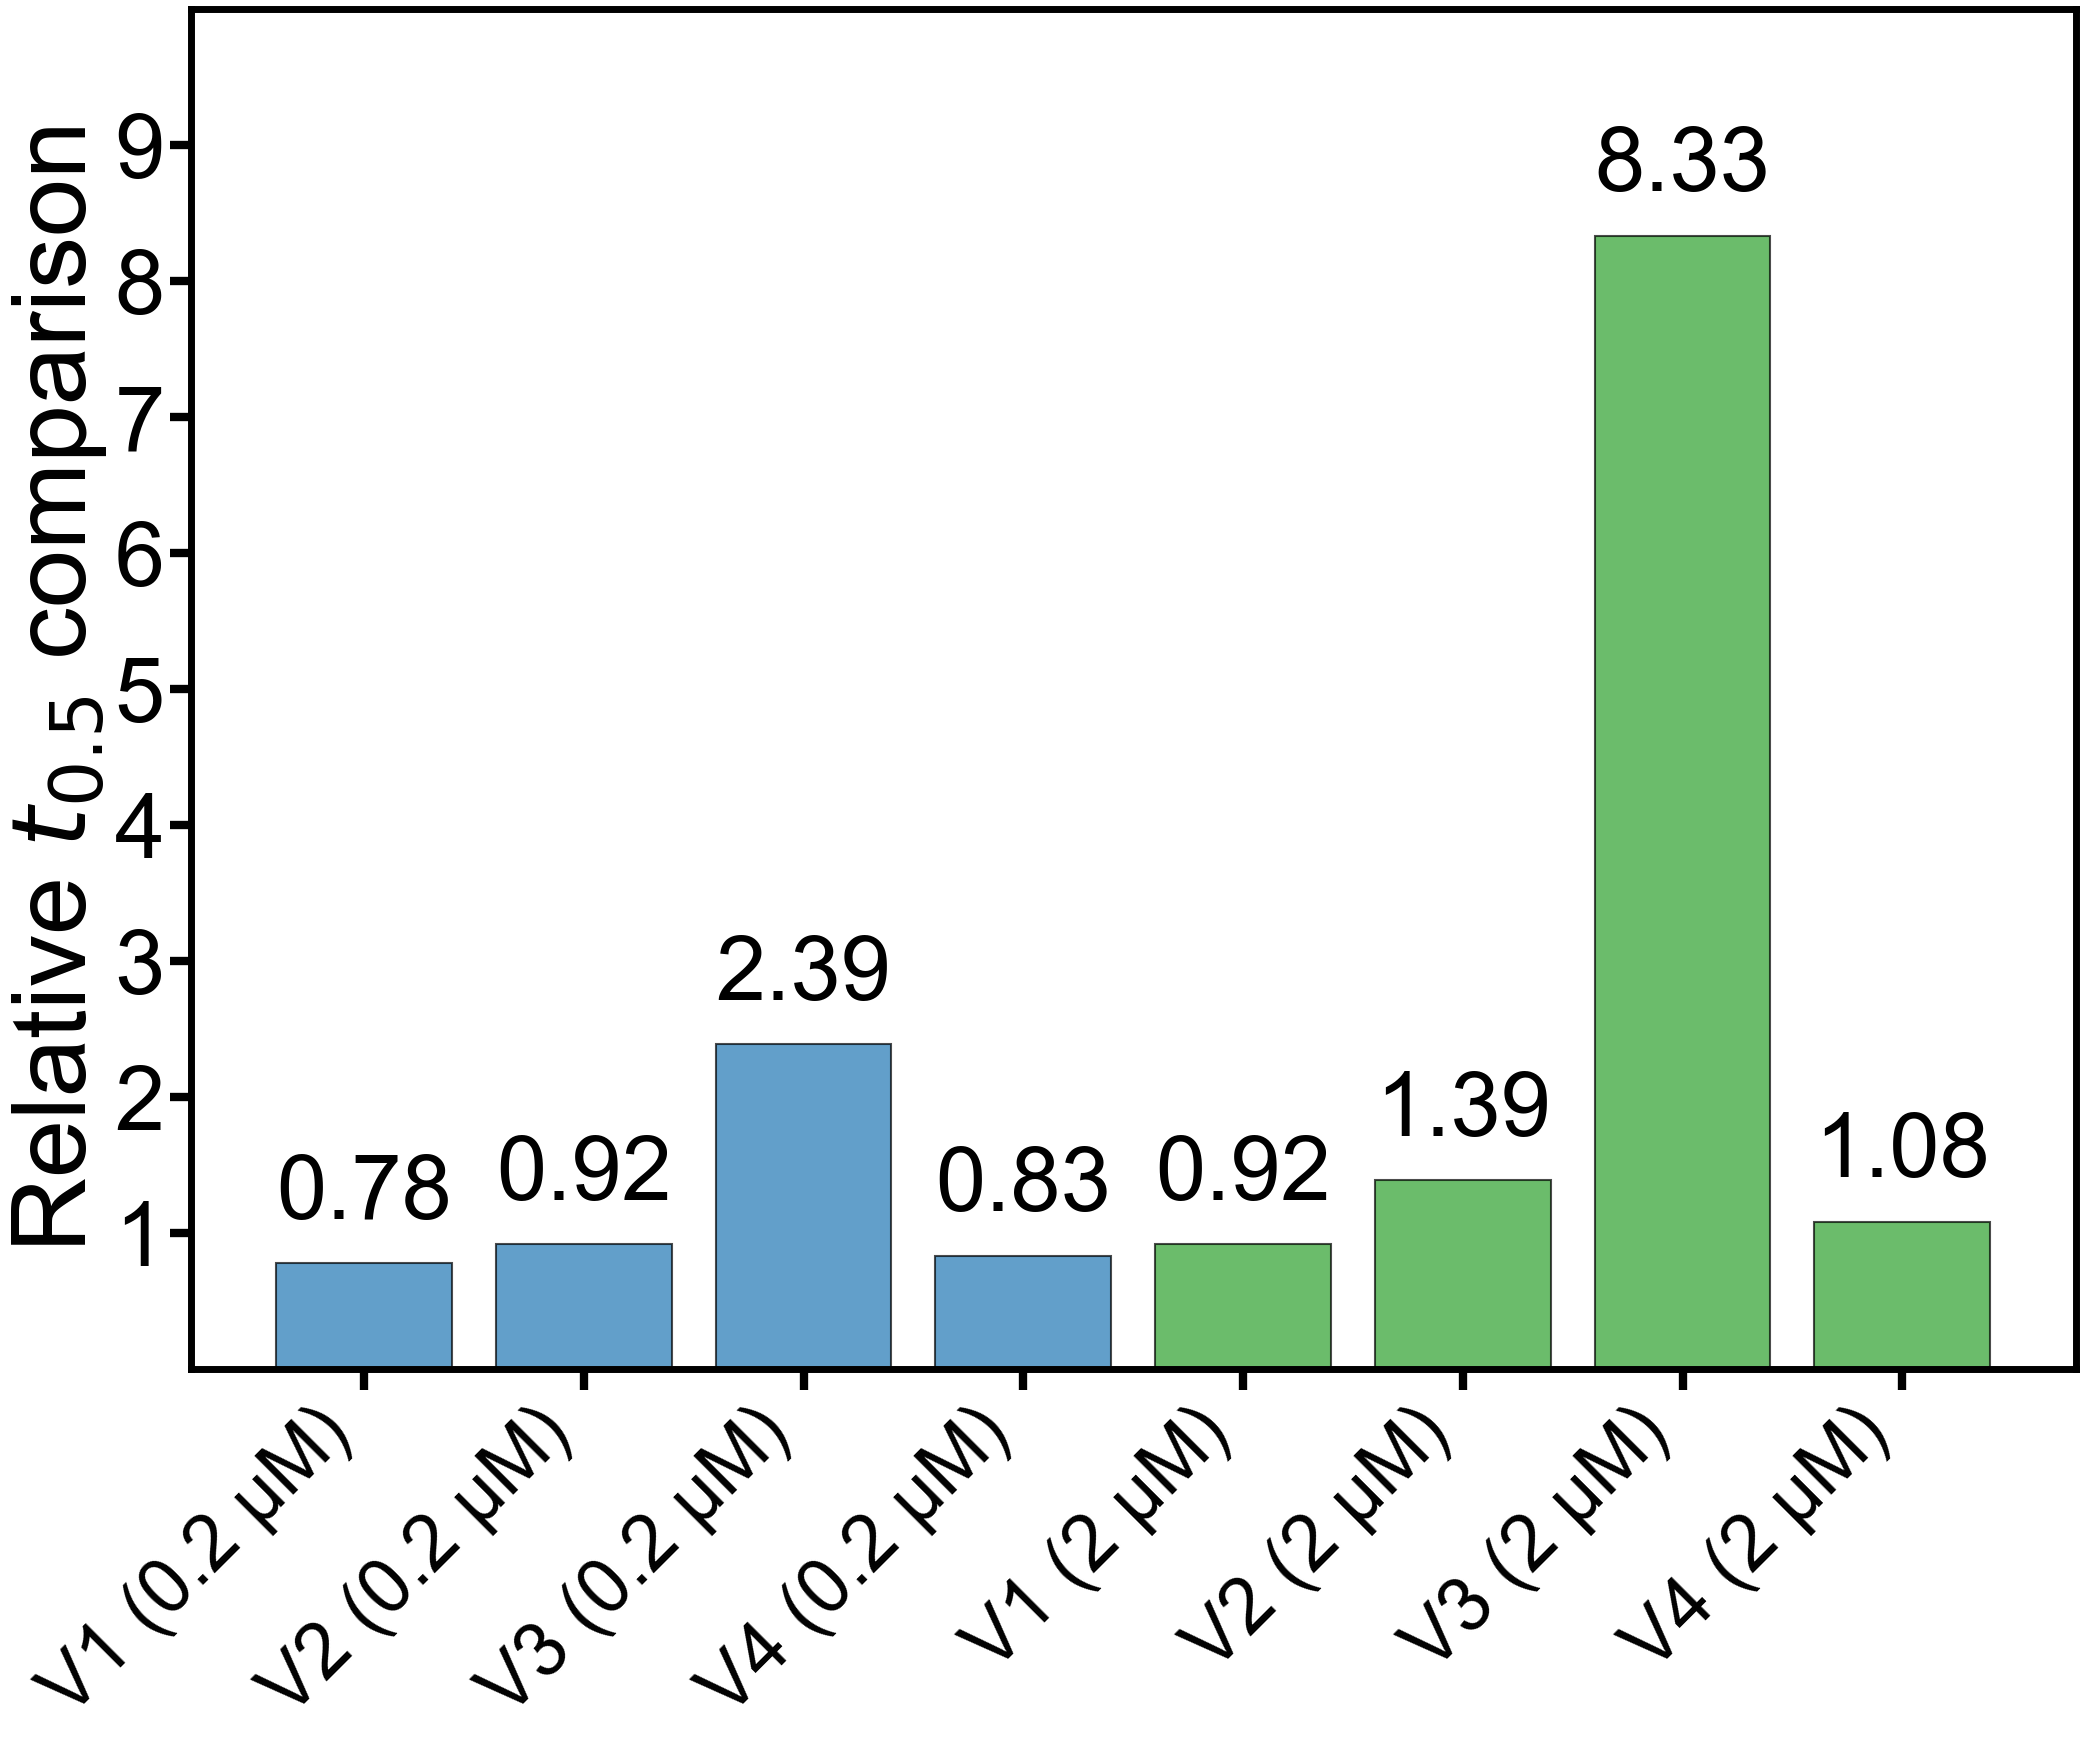

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'Figure2-Distractions.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract all sample columns (excluding 'time')
sample_columns = data.columns[1:]

# Determine the time each sample exceeds 100
time_to_threshold = {}
for col in sample_columns:
    label = col.strip()
    if "no target" in label.lower() or "neg" in label.lower():
        continue
    above_threshold = data[data[label] > 100]
    time_to_threshold[label] = above_threshold.iloc[0]['time'] if not above_threshold.empty else None

# Get and remove reference
reference_label = 'pos tTetO'
reference_time = time_to_threshold.pop(reference_label, None)
if reference_time is None:
    raise ValueError("Reference time for 'pos tTetO' not found.")

# Normalize all other samples to reference
normalized_values = {
    label: time / reference_time
    for label, time in time_to_threshold.items() if time is not None
}

# Desired plot order
plot_order = [
    "Version 1 at 0.2 µM", "Version 2 at 0.2 µM",
    "Version 3 at 0.2 µM", "Version 4 at 0.2 µM",
    "Version 1 at 2 µM",   "Version 2 at 2 µM",
    "Version 3 at 2 µM",   "Version 4 at 2 µM"
]

# Filter and format
labels_to_plot = [label for label in plot_order if label in normalized_values]
values_to_plot = [normalized_values[label] for label in labels_to_plot]
x_labels = [
    label.replace("Version ", "V").replace(" at ", " (") + ")"
    for label in labels_to_plot
]

# Define colors
bar_colors = ['#1f77b4' if '0.2' in label else '#2ca02c' for label in labels_to_plot]

# Plotting
fig, ax = plt.subplots(figsize=(21, 17.5))
bars = ax.bar(
    x_labels,
    values_to_plot,
    color=bar_colors,
    edgecolor='black',
    linewidth=1.5,
    alpha=0.7
)

# Value labels above bars
for bar, val in zip(bars, values_to_plot):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        val + 0.2,
        f"{val:.2f}",
        ha='center',
        va='bottom',
        fontsize=65,
        fontweight='bold'
    )

# Axis styling
ax.set_ylim([0, 10])
ax.set_yticks(np.arange(1, 10, 1))  # Only ticks from 1 to 9 (not 10)
ax.set_ylabel("Relative $t_{0.5}$ comparison", fontsize=75)
ax.tick_params(axis='both', which='major', length=15, width=6)
ax.tick_params(axis='y', labelsize=65)

# Properly set x-ticks and labels to avoid warning
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=55)
plt.rcParams['axes.linewidth'] = 5.2

plt.tight_layout()
plt.savefig('Figure2-Distractions.svg', format='svg', dpi=300)
plt.show()